In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

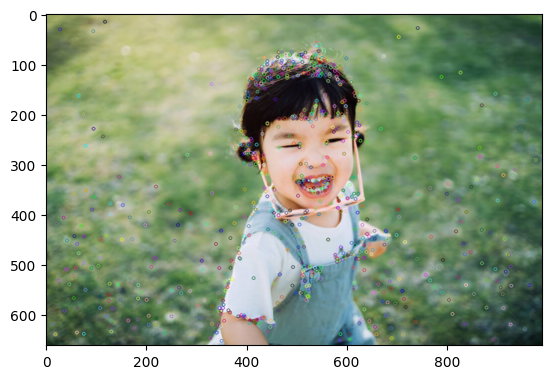

In [4]:
img = cv2.imread("../day8/data/kid.jpg")
sift = cv2.SIFT_create()
key_points, descriptors = sift.detectAndCompute(img, None)
img_with_sift = cv2.drawKeypoints(img, key_points, None)
plt.imshow(cv2.cvtColor(img_with_sift, cv2.COLOR_BGR2RGB))
plt.show()

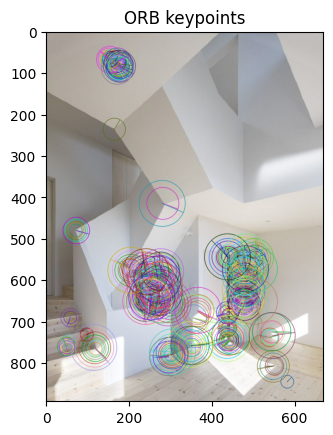

In [6]:
house_image =  cv2.imread("../day8/data/house.jpg")
gray = cv2.cvtColor(house_image, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
key_points, descriptors = orb.detectAndCompute(gray, None)
image_with_keypoints = cv2.drawKeypoints(house_image, key_points, None,
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("ORB keypoints")
plt.show()

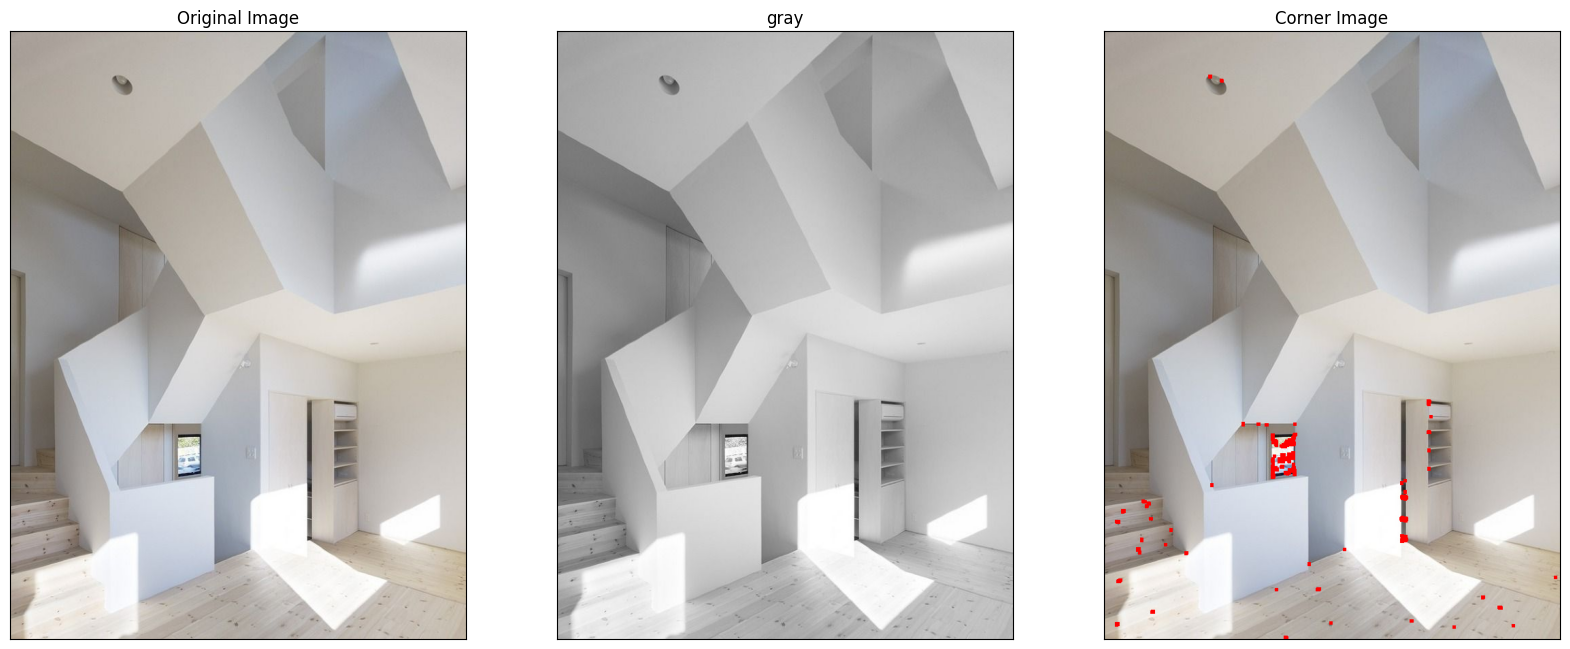

In [31]:
house_image =  cv2.imread("../day8/data/house.jpg")
gray = cv2.cvtColor(house_image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5, 5), np.uint8)
dis = cv2.cornerHarris(gray, 2, 1, 0.04)
dis = cv2.dilate(dis, kernel, iterations=1)
thresh = 0.01 * dis.max()

corner_image = house_image.copy()
corner_image[dis > thresh] = [0, 0, 255]
# plt.imshow(dis, cmap="gray")
images = [house_image, gray, corner_image]
titles = ["Original Image", "gray" ,"Corner Image"]
plt.figure(figsize=(20, 15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

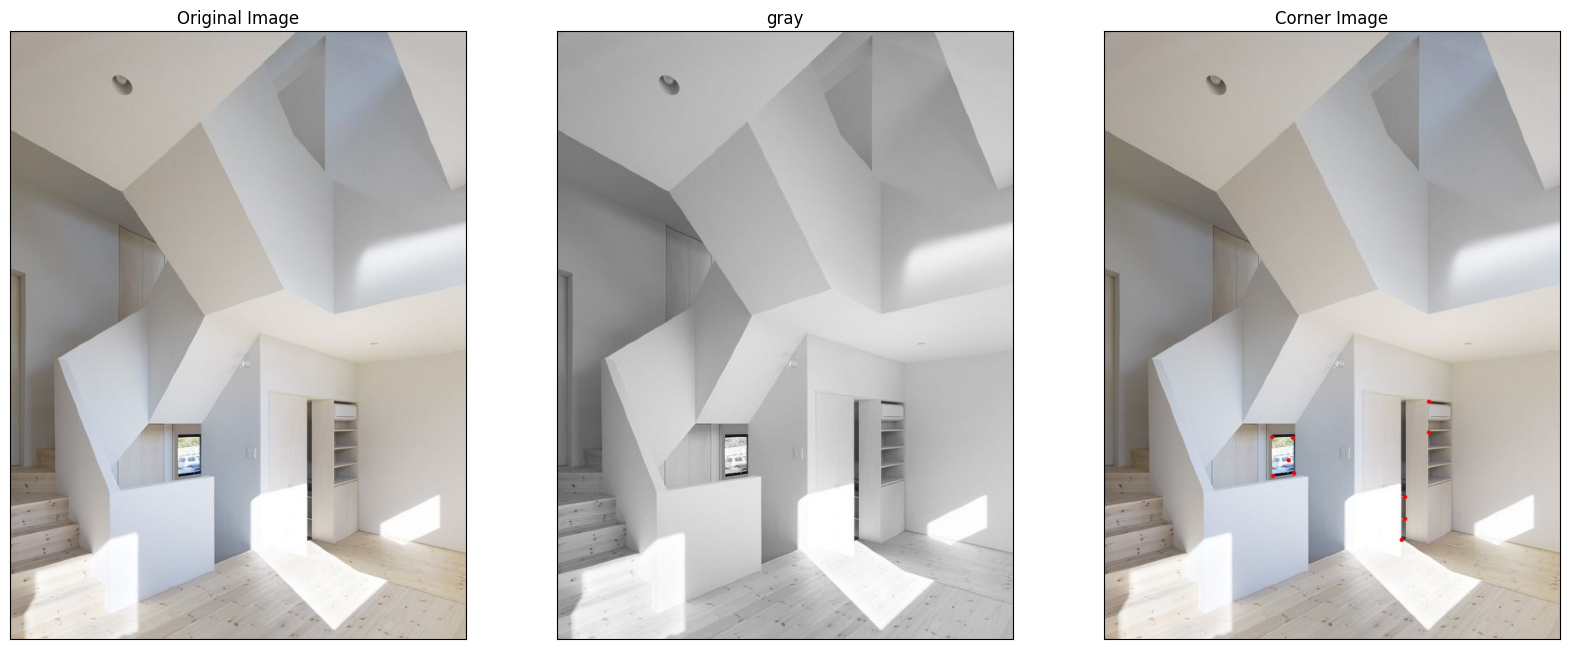

In [32]:
house_image = cv2.imread("../day8/data/house.jpg")
gray_house = cv2.cvtColor(house_image, cv2.COLOR_BGR2GRAY)
corner_image = cv2.goodFeaturesToTrack(gray_house, 10, 0.05, 10)
corner_image = np.intp(corner_image)
house_copy = house_image.copy()
for i in corner_image:
    x, y = i.ravel()
    cv2.circle(house_copy, (x, y), 3, (0,0,255), -1)
images = [house_image, gray_house, house_copy]
titles = ["Original Image", "gray" ,"Corner Image"]
plt.figure(figsize=(20, 15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()